# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize period)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
#start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define the periods

In [4]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    _, strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [6]:
metrics = ('start',
           'ending_balance',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'trades_per_year',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
start,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-12-17,1994-01-24,1994-03-01,1994-04-06,1994-05-12,1994-06-17,1994-07-25,1994-08-29,1994-10-04,1994-11-08,1994-12-14,1995-01-20
ending_balance,46546.59,50954.29,37189.16,34212.65,35359.42,34283.77,39175.88,43920.58,44327.35,43635.39,50204.97,58990.60,59671.09,77016.18,78113.71,76157.49,69200.91,67692.70,62689.22
annual_return_rate,5.95,6.31,5.06,4.73,4.86,4.74,5.26,5.74,5.80,5.76,6.35,7.03,7.11,8.20,8.29,8.21,7.84,7.78,7.49
max_closed_out_drawdown,-40.75,-36.98,-45.96,-43.39,-39.50,-35.93,-28.88,-24.19,-24.21,-26.31,-25.85,-23.64,-27.75,-26.29,-23.52,-27.39,-31.58,-29.79,-30.11
drawdown_annualized_return,-6.85,-5.86,-9.09,-9.17,-8.13,-7.58,-5.48,-4.21,-4.17,-4.57,-4.07,-3.36,-3.90,-3.21,-2.84,-3.33,-4.03,-3.83,-4.02
drawdown_recovery,-3.70,-3.73,-3.72,-3.74,-3.72,-3.74,-3.74,-3.74,-3.06,-0.20,-0.66,-0.20,-0.21,-0.23,-0.23,-0.62,-0.63,-0.63,-0.63
best_month,13.19,13.21,15.29,15.23,15.28,15.27,13.23,13.29,14.35,14.37,14.36,13.90,13.88,13.90,15.95,15.90,17.74,17.75,17.73
worst_month,-17.55,-17.56,-17.58,-17.54,-17.57,-17.56,-17.55,-17.54,-18.93,-16.96,-19.08,-19.07,-19.10,-19.12,-19.12,-19.08,-20.93,-20.93,-23.03
sharpe_ratio,0.55,0.60,0.50,0.47,0.49,0.48,0.54,0.58,0.58,0.57,0.61,0.67,0.67,0.76,0.76,0.75,0.71,0.70,0.67
sortino_ratio,0.58,0.63,0.51,0.48,0.49,0.48,0.53,0.59,0.61,0.59,0.65,0.71,0.72,0.83,0.84,0.84,0.78,0.78,0.74


Bar graphs

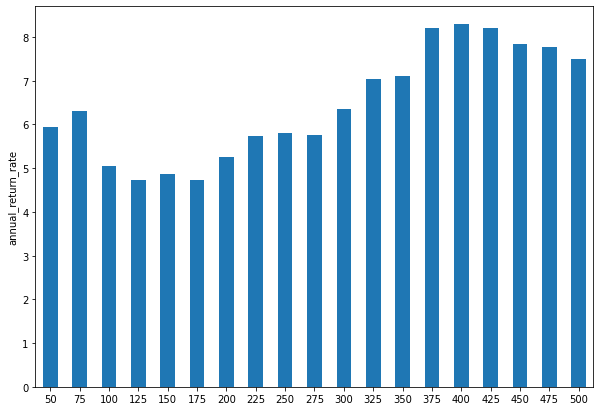

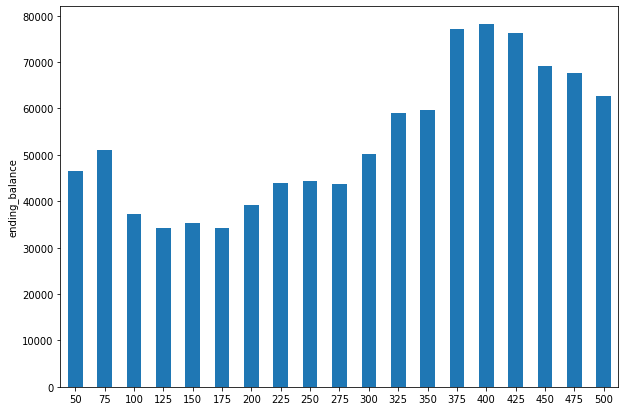

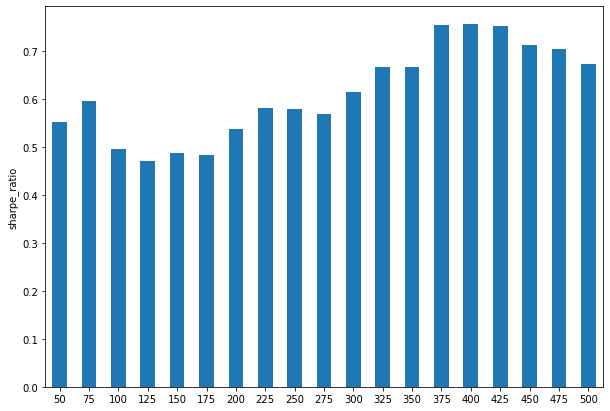

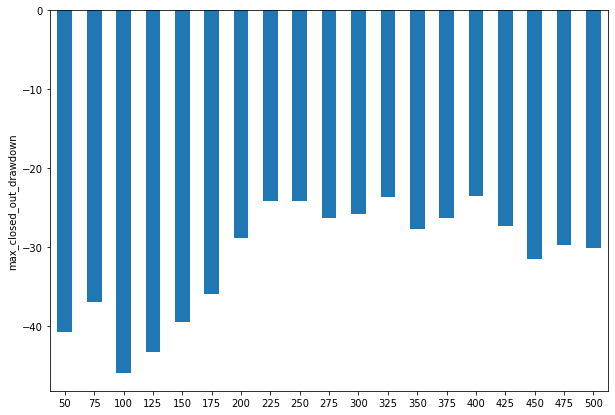

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-06-22 00:00:00 SELL 215 SPY @ 310.67


Equity curve

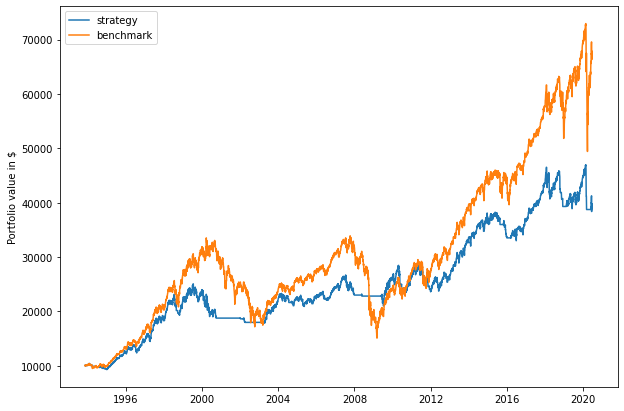

In [9]:
pf.plot_equity_curve(strategies['200'].dbal, benchmark=benchmark.dbal)